# **Należy zbudować MLP redukując ryzyko przetrenowania modelu, a także stosujące różne metody optymalizacji. Jaka jest dokładność danych uczących, a jaka testowych?**

 Do implementacji sieci neuronowych w Pythonie stosowane są głównie dwa pakiety: TensorFlow i PyTorch. Perceptron wielowarstwowy zostanie zaimplementowany za pomocą interfejsu Keras (stanowi część biblioteki TensorFlow).

# **IMPORT ODPOWIEDNICH BIBLIOTEK**

In [6]:
import numpy as np
import tensorflow as tf


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 68.8M/68.8M [00:03<00:00, 23.4MB/s]

Extracting files...


Path to dataset files: C:\Users\tomek\.cache\kagglehub\datasets\zalando-research\fashionmnist\versions\4


# **WCZYTANIE ZBIORU DANYCH**

In [9]:
import pandas as pd
import os

# Ścieżka do plików
train_file = os.path.join(path, "fashion-mnist_train.csv")
test_file = os.path.join(path, "fashion-mnist_test.csv")

# Wczytanie danych
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Sprawdzenie pierwszych kilku wierszy danych
print("Train data:")
print(train_data.head())
print("\nTest data:")
print(test_data.head())

Train data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

# **DATA PREPROCESSING**

Podczas wczytywania zestawu danych za pomocą modułu Keras należy pamiętać, że każdy obraz będzie reprezentowany w postaci tablicy 28x28, a nie jednowymiarowej tablicy o rozmiarze 784 (moduł Scikit-Learn). Nasycenie kolorami jest wyrażone liczbami całkowitymi.

Zmiana rozmiaru, przekształcenie macierzy 28 x 28 na wektor 784 cech. Normalizacja odcienia pikseli do zakresu [0,1] -> dzielenie przez 255

In [10]:
X_train = train_data.iloc[:, 1:].values  
y_train = train_data.iloc[:, 0].values  

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (60000, 784), y_train shape: (60000,)
X_test shape: (10000, 784), y_test shape: (10000,)


Przy korzystaniu z klasycznych algorytmów uczenia maszynowego do rozwiązywania problemów klasyfikacji i regresji, dane były dzielone na dwa zbiory: treningowy i testowy. Tym razem dane należy podzielić na trzy zbiory: uczący, walidacyjny i testowy. Zbiór uczący wykorzystywany jest do treningu modelu, a testowy do jego ewaluacji. Zbiór walidacyjny posłuży do ewaluacji sieci neuronowej podczas treningu. Zbiór MNIST jest podzielony na zbiór uczący i testowy, natomiast wyodrębnimy 5000 obrazów ze zbioru treningowego do walidacji.

In [11]:
# Normalizacja danych
X_train = X_train / 255.0
X_test = X_test / 255.0

# Sprawdź zakres wartości po normalizacji
print(f"Minimalna wartość w X_train: {X_train.min()}, maksymalna: {X_train.max()}")
print(f"Minimalna wartość w X_test: {X_test.min()}, maksymalna: {X_test.max()}")



Minimalna wartość w X_train: 0.0, maksymalna: 1.0
Minimalna wartość w X_test: 0.0, maksymalna: 1.0


In [12]:
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

print(f"X_train reshaped shape: {X_train.shape}")
print(f"X_test reshaped shape: {X_test.shape}")

X_train reshaped shape: (60000, 28, 28)
X_test reshaped shape: (10000, 28, 28)


In [13]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")


y_train_one_hot shape: (60000, 10)
y_test_one_hot shape: (10000, 10)


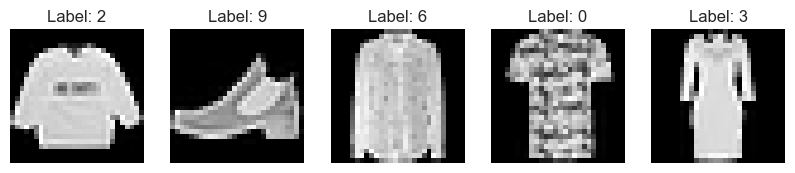

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Label: {y_train[i]}")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train_full, X_val, y_train_full, y_val = train_test_split(
    X_train, y_train_one_hot, test_size=5000 / len(X_train), random_state=42
)

print(f"Rozmiar zbioru uczącego: {X_train_full.shape}")
print(f"Rozmiar zbioru walidacyjnego: {X_val.shape}")
print(f"Rozmiar zbioru testowego: {X_test.shape}")


Rozmiar zbioru uczącego: (55000, 28, 28)
Rozmiar zbioru walidacyjnego: (5000, 28, 28)
Rozmiar zbioru testowego: (10000, 28, 28)


# **TWORZENIE MODELU PERPECTRONU WIELOWARSTWOWEGO**

Model:
*   Ziarno losowości = 42.
*   Pierwsza warstwa (InputLayer): wymiary warstwy (shape) odnoszą się do wymiarów obiektów. Keras musi znać wymiary danych wejściowych.
*   Warstwa ukryta gęsta (Dense) składająca się z 256 neuronów, która korzysta z funkcji aktywacji ReLU (każda warswa Dense zarządza swoją macierzą wag oraz wektorem obciążeń)
*   Warstwa porzucenia, gdzie połowa neuronów zostanie wyłączona.
*   Warstwa ukryta gęsta (Dense) składająca się z 256 neuronów, która korzysta z funkcji aktywacji ReLU
*   Warstwa porzucenia, gdzie połowa neuronów zostanie wyłączona.
*   Warstwa wyjściowa gęsta (Dense) składająca się z 10 neuronów (po jednym na każdą klasę) z wyznaczoną funkcją aktywacji softmax, ponieważ klasy wykluczają się wzajemnie


Zapobieganie przeuczeniu modelu:

*   zmniejszenie liczby epok
*   **wprowadzenie callbacks**
*   **wyłączenie części neuronów (Dropout layers)**



In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),   
    Dense(10, activation='softmax') 
])

model.compile(
    optimizer='adam',               
    loss='categorical_crossentropy', 
    metrics=['accuracy']             
)

model.summary()


C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Jaka jest liczba parametrów w poszczególnych warstwach modelu?

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# **TRENOWANIE MODELU**

Należy wywołać metodę fit():
*   cechy wejściowe (X_train)
*   Klasy docelowe (y_train)
*   Liczba epok (epochs) = 100
*   Przebieg walidacyjny
*   Callbacks



Należy stworzyć obiekt EarlyStopping w TensorFlow, który służy do wczesnego zatrzymania trenowania modelu, aby zapobiec nadmiernemu dopasowaniu. Jeśli przez 3 kolejne epoki wartość val_loss nie zmniejszy się (lub wręcz wzrośnie), trenowanie zostanie przerwane.

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=3,            # Przerwanie, jeśli brak poprawy przez 3 epoki
    restore_best_weights=True  
)

# Trenowanie modelu
history = model.fit(
    X_train_full,           
    y_train_full,          
    epochs=100,             
    validation_data=(X_val, y_val),  
    callbacks=[early_stopping],     
    batch_size=32           
)

print("Trenowanie zakończone.")


Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7637 - loss: 0.6603 - val_accuracy: 0.8454 - val_loss: 0.4182
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8618 - loss: 0.3798 - val_accuracy: 0.8748 - val_loss: 0.3479
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8772 - loss: 0.3397 - val_accuracy: 0.8714 - val_loss: 0.3482
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8880 - loss: 0.3067 - val_accuracy: 0.8754 - val_loss: 0.3179
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8925 - loss: 0.2930 - val_accuracy: 0.8848 - val_loss: 0.3053
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8988 - loss: 0.2813 - val_accuracy: 0.8872 - val_loss: 0.3184
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9002 - loss: 0.2671 - val_accuracy: 0.8884 - val_loss: 0.3164
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9066 - loss: 0

Epoch 1/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7650 - loss: 0.7498 - val_accuracy: 0.9652 - val_loss: 0.1300
Epoch 2/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9290 - loss: 0.2484 - val_accuracy: 0.9722 - val_loss: 0.0986
Epoch 3/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9450 - loss: 0.1880 - val_accuracy: 0.9754 - val_loss: 0.0870
Epoch 4/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9529 - loss: 0.1618 - val_accuracy: 0.9742 - val_loss: 0.0881
Epoch 5/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9583 - loss: 0.1456 - val_accuracy: 0.9762 - val_loss: 0.0804
Epoch 6/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9622 - loss: 0.1332 - val_accuracy: 0.9778 - val_loss: 0.0812
Epoch 7/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9630 - loss: 0.1320 - val_accuracy: 0.9782 - val_loss: 0.0835
Epoch 8/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9657 - loss: 0.1181 - val

# **KRZYWE UCZENIA**

Należy wykorzystać słownik (history.history). Krzywe uczenia: średnia funkcja straty uczenia i dokładność zmierzone w każdej epoce dla zestawu treningowego i walidacyjnego

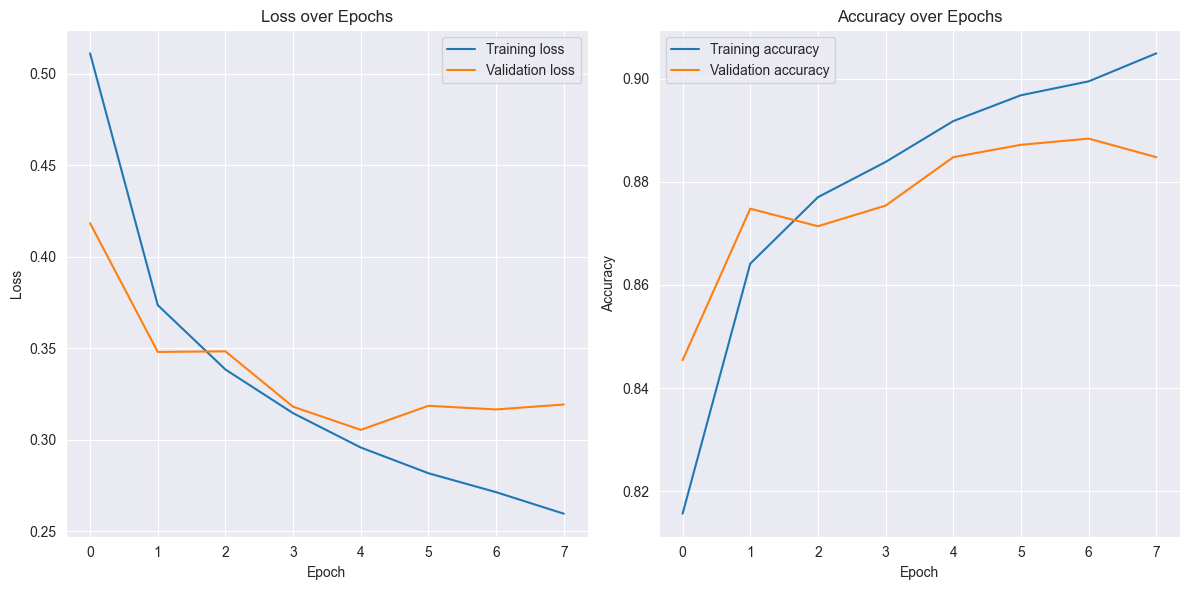

In [19]:
import matplotlib.pyplot as plt


history_dict = history.history


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training loss')
plt.plot(history_dict['val_loss'], label='Validation loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Jak zinterpretować uzyskane wyniki?
Krzywa straty pokazuje, jak model minimalizuje błąd w każdej epoce. Wartości straty oznaczają, jak "daleko" model jest od rzeczywistej odpowiedzi. Mniejsza wartość straty oznacza, że model lepiej dopasowuje swoje przewidywania do rzeczywistych danych.

Treningowa strona (Training loss): Powinna maleć z każdą kolejną epoką, jeśli model się uczy. Jeśli straty osiągną plateau lub zaczną rosnąć, może to oznaczać, że model przestał się poprawiać lub zaczął przeuczać się na dane treningowe.

Walidacyjna strona (Validation loss): Krzywa ta pokazuje, jak dobrze model generalizuje na nowych, niewidzianych danych. Idealnie, wartość walidacyjnej straty powinna maleć wraz z treningiem, ale jeśli zacznie rosnąć, oznacza to, że model zaczyna przeuczać się (overfitting) na zbiorze treningowym i nie potrafi dobrze radzić sobie z danymi walidacyjnymi.


Czy model jest przeuczony?
Tak

# **OCENA MODELU**

In [21]:

from tensorflow.keras.utils import to_categorical

# Konwersja etykiet do formatu one-hot
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Ocena modelu na zbiorze testowym
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot, verbose=2)

# Wyświetlenie wyników
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



313/313 - 1s - 3ms/step - accuracy: 0.8857 - loss: 0.3089
Test Loss: 0.3089
Test Accuracy: 0.8857


# **PROGNOZY MODELU**

In [24]:
import numpy as np
predictions = model.predict(X_test, verbose=2)

print(predictions[:5])


predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes[:5])


313/313 - 1s - 2ms/step
[[7.8423572e-01 2.1750943e-06 3.8332276e-03 3.9266379e-04 1.9451823e-04
  1.0005155e-07 2.1125048e-01 1.0514943e-09 9.1102374e-05 4.8341158e-09]
 [7.6992528e-08 9.9999905e-01 3.4048774e-08 8.4199269e-07 2.8142155e-09
  1.6798909e-16 2.6066982e-09 9.2332646e-21 6.9216286e-12 3.5108491e-16]
 [3.6753230e-02 4.3222212e-04 7.2005570e-01 4.4557462e-03 2.3404205e-02
  6.6281391e-05 2.1191923e-01 4.7308695e-06 2.8961746e-03 1.2498462e-05]
 [1.5568963e-01 5.7027428e-06 7.6014686e-01 5.1603123e-04 2.4058574e-03
  2.8182703e-07 7.8797057e-02 1.4508631e-08 2.4384817e-03 9.8259889e-08]
 [1.7018841e-03 4.9667461e-03 2.0648394e-02 3.4233472e-01 5.8524281e-01
  1.0922528e-06 3.6184441e-02 7.9923839e-06 8.6050835e-03 3.0689538e-04]]
[0 1 2 2 4]


Przewidywana etykieta:  [7 2 1 0 4 1 4 9 5 9]
Rzeczywista etykieta:   [7 2 1 0 4 1 4 9 5 9]


# **PONOWANE TRENOWANIE MODELU**

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Example dataset: Replace with your actual dataset
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100)  # 100 labels (0 or 1)

# One-hot encode the labels for categorical cross-entropy
y = to_categorical(y, num_classes=2)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()

# Input layer (e.g., 10 features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer with 2 neurons and softmax activation for binary classification
model.add(Dense(2, activation='softmax'))

# Compile the model with categorical crossentropy loss for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.5641 - loss: 0.6824 - val_accuracy: 0.5000 - val_loss: 0.6801
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6711 - loss: 0.6732 - val_accuracy: 0.5500 - val_loss: 0.6761
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6094 - loss: 0.6729 - val_accuracy: 0.6500 - val_loss: 0.6729
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6273 - loss: 0.6644 - val_accuracy: 0.6500 - val_loss: 0.6713
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6477 - loss: 0.6603 - val_accuracy: 0.6500 - val_loss: 0.6709
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6594 - loss: 0.6569 - val_accuracy: 0.6500 - val_loss: 0.6717
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6633 - loss: 0.6525 - val_accuracy: 0.6500 - val_loss: 0.6723
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6648 - loss: 0.6475 - val_accuracy: 0.6500 - val_loss: 0.6736

# **Ocena modelu na zbiorze testowym**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Tworzymy model
model = Sequential()

# Warstwa wejściowa, spłaszczająca dane wejściowe (28x28)
model.add(Flatten(input_shape=(28, 28)))

# Dodajemy warstwy ukryte
model.add(Dense(128, activation='relu'))

# Warstwa wyjściowa, dla klasyfikacji 10 klas
model.add(Dense(10, activation='softmax'))

# Kompilowanie modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model jest gotowy do trenowania
model.summary()


C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# **PROGNOZY MODELU**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Pierwsze 5 prognoz (prawdopodobieństwa dla każdej klasy):
[[0.05333728 0.08130257 0.10675396 0.05268517 0.04518548 0.25705257
  0.15235771 0.08289944 0.09775472 0.07067119]
 [0.10209727 0.12056757 0.07958106 0.08654    0.06549908 0.1303403
  0.09744853 0.1527469  0.11931968 0.04585961]
 [0.10520916 0.06771262 0.09824713 0.08176891 0.07086261 0.14328237
  0.12432709 0.10283834 0.11456186 0.09118989]
 [0.0695549  0.11249776 0.07816093 0.09023503 0.03635486 0.10056351
  0.20417392 0.04340924 0.17554532 0.08950453]
 [0.0625845  0.14034338 0.10862464 0.12729326 0.0435076  0.12167048
  0.1369956  0.12867363 0.10455167 0.0257552 ]]

Pierwsze 5 przewidywanych klas:
[5 7 5 6 1]

Dokładność modelu: 0.0797

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.01      0.00      0.00      1000
           1       0.05      0.01      0.01      1000
           2       0.09      0.07      0.08      1000
           3   

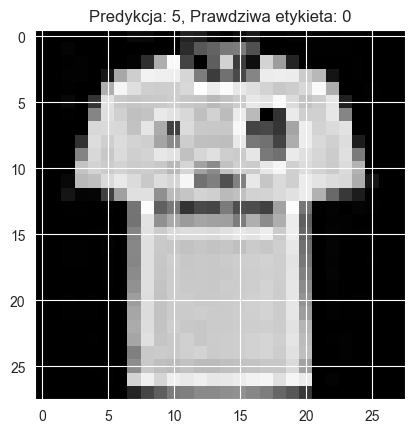

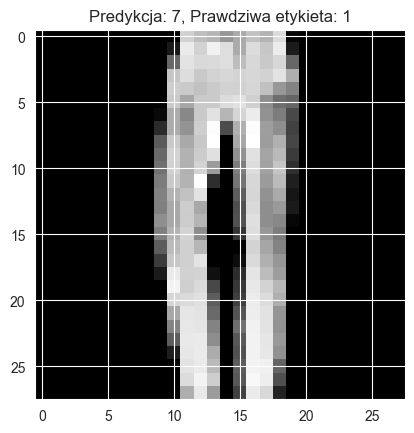

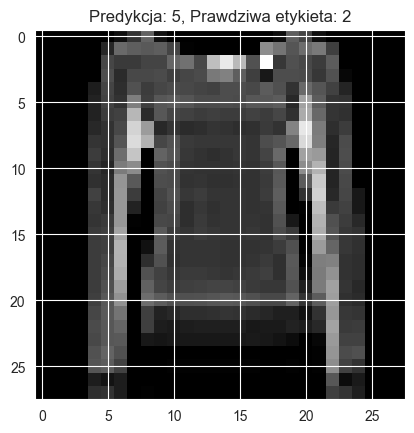

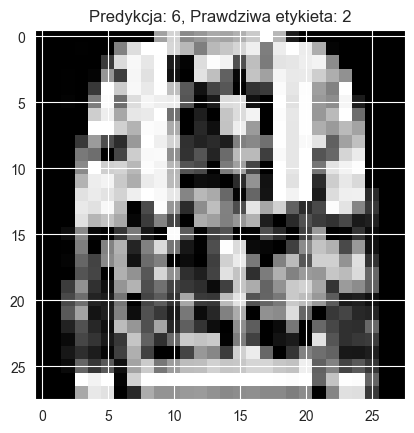

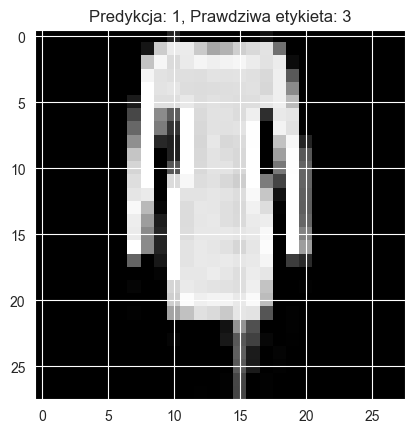

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Krok 1: Generowanie prognoz na zbiorze testowym
predictions = model.predict(X_test)

print("Pierwsze 5 prognoz (prawdopodobieństwa dla każdej klasy):")
print(predictions[:5])  # Wyświetl pierwsze 5 prognoz

# Krok 2: Uzyskiwanie etykiet klas z prawdopodobieństw
predicted_classes = predictions.argmax(axis=-1)

print("\nPierwsze 5 przewidywanych klas:")
print(predicted_classes[:5])  # Wyświetl pierwsze 5 przewidywanych klas

# Krok 3: Ewaluacja modelu
accuracy = accuracy_score(y_test, predicted_classes)
print(f"\nDokładność modelu: {accuracy:.4f}")

print("\nRaport klasyfikacji:")
print(classification_report(y_test, predicted_classes))

# Krok 4: Wizualizacja wyników
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Załóżmy, że obrazy mają rozmiar 28x28
    plt.title(f"Predykcja: {predicted_classes[i]}, Prawdziwa etykieta: {y_test[i]}")
    plt.show()
